In [3]:
import pandas as pd
import numpy as np




# For reproducibility
np.random.seed(42)

# Generate synthetic dataset
n = 500  # number of employees
data = pd.DataFrame({
    'Age': np.random.randint(20, 60, n),
    'Tenure': np.random.randint(0, 20, n),
    'Salary': np.random.randint(30000, 120000, n),
    'Commute_Distance': np.random.randint(1, 50, n),
    'Performance_Score': np.random.randint(1, 6, n),  # 1-5 rating
    'Overtime_Hours': np.random.randint(0, 20, n),
})

# Create target variable: 1 = left, 0 = stayed
data['Attrition'] = (
    (data['Tenure'] < 3) & 
    (data['Performance_Score'] < 3) & 
    (data['Overtime_Hours'] > 10)
).astype(int)

data.head()


,Age,Tenure,Salary,Commute_Distance,Performance_Score,Overtime_Hours,Attrition
0,58,19,43718,29,3,7,0
1,48,18,64560,12,4,2,0
2,34,14,106589,39,2,9,0
3,27,15,52116,2,3,1,0
4,40,4,66244,32,3,10,0


In [10]:
data['Attrition']=((data['Tenure']<3) & (data['Performance_Score']<3) & (data['Overtime_Hours']>10)).astype(int)

In [11]:
print(data.shape)

(500, 7)


In [17]:
import matplotlib.pyplot as plt

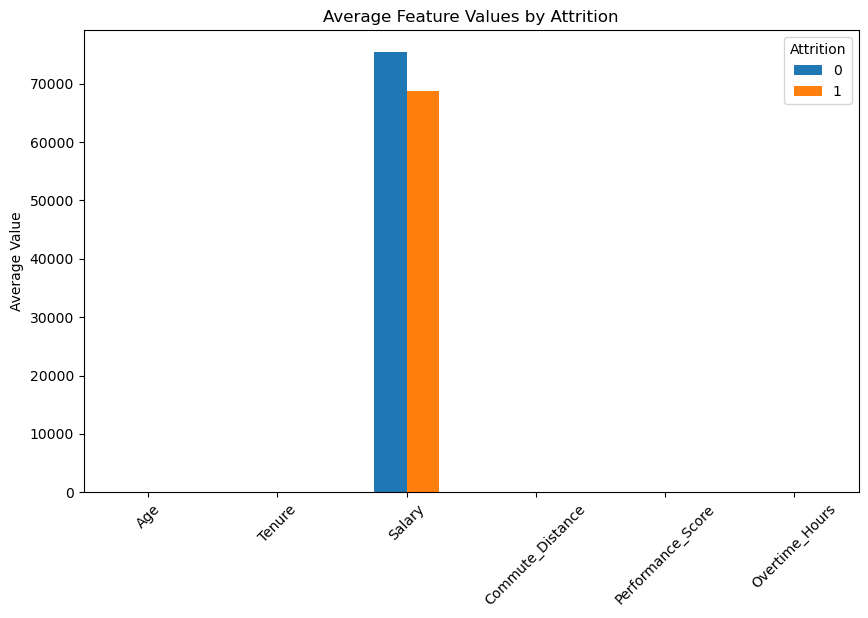

In [20]:
group_means.T.plot(kind='bar', figsize=(10,6))
plt.title("Average Feature Values by Attrition")
plt.ylabel("Average Value")
plt.xticks(rotation=45)
plt.show()


In [19]:
group_means = data.groupby('Attrition').mean()

In [22]:
from sklearn.model_selection import train_test_split

In [46]:
X=data.drop('Attrition',axis=1)
y=data['Attrition']

X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [27]:
from sklearn.linear_model import LogisticRegression

In [30]:
model=LogisticRegression(max_iter=1000)

In [47]:
model.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

In [48]:
y_pred_prob = model.predict_proba(X_test)[:, 1]


In [49]:
print(y_pred_prob[:10])

[4.94006333e-09 6.73500307e-08 1.66254174e-04 3.38240951e-06
 6.68926304e-05 2.89960052e-06 5.11966562e-09 2.77118594e-07
 1.19484222e-04 4.25633107e-08]


In [50]:
from sklearn.metrics import accuracy_score, roc_auc_score

In [51]:
y_pred_class = model.predict(X_test)

In [52]:
accuracy = accuracy_score(Y_test, y_pred_class)
print("Accuracy:", accuracy)

Accuracy: 0.99


In [53]:
roc_auc = roc_auc_score(Y_test, y_pred_prob)
print("ROC AUC:", roc_auc)

ROC AUC: 0.993127147766323


In [45]:
print(Y_test.value_counts())

Attrition
0    100
Name: count, dtype: int64


In [54]:

coeffs = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})

In [55]:
coeffs = coeffs.sort_values(by='Coefficient', ascending=False)


In [56]:
print(coeffs)

             Feature  Coefficient
5     Overtime_Hours     0.419600
0                Age     0.032425
3   Commute_Distance     0.030889
2             Salary    -0.000002
1             Tenure    -1.146055
4  Performance_Score    -1.907499
